In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced
from phasor.utilities.ipynb.sympy import *

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 
from phasor import mechanical

b'2017-09-22 09:45:51 -0400 (a76310c5d4476904171a3f1b18117db454719432)'
Sympy version:  1.0


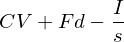

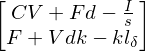

In [15]:
d = sympy.var('d')
N = sympy.var('N')
l = sympy.var('l')
A = sympy.var('A')
s = sympy.var('s')
k = sympy.var('k')
F = sympy.var('F')
epsilon = sympy.var('epsilon')
epsilon_0 = sympy.var('epsilon_0')

d_l = sympy.var('l_delta')
V = sympy.var('V')
I = sympy.var('I')
C = sympy.var('C')

Z_e = sympy.var('Z_e', real = True)
Z_m = sympy.var('Z_m', real = True)
k_e = sympy.sqrt(1/sympy.re(Z_e))
k_m = sympy.sqrt(1/sympy.im(Z_m))
k_e = sympy.var('k_e', real = True)
k_m = sympy.var('k_m', real = True)
k_e = sympy.sympify(1)
k_m = sympy.sympify(1)

expr1 = d * F  - I/s + C * V
display(expr1)
expr2 = -d_l * k + F + k * d * V
display(expr2)

rel = sympy.Matrix([[C, -1/s, d, 0],[d*k, 0, 1, -k]])
var = sympy.Matrix([V, I, F, d_l])
rel * var

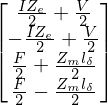

In [16]:
trans = sympy.Matrix([
    [k_e/2,  k_e/2 * Z_e            , 0, 0], 
    [k_e/2, -k_e/2 * Z_e.conjugate(), 0, 0], 
    [0, 0, k_m/2,  k_m/2 * Z_m            ],
    [0, 0, k_m/2, -k_m/2 * Z_m.conjugate()],
])
trans * var

In [17]:
rel_ab = rel * trans**-1
rel_a = rel_ab[:,::2]
rel_b = rel_ab[:,1::2]


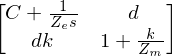

In [18]:
rel_b

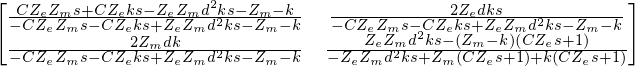

In [19]:
rel_atob = -rel_b**-1 * rel_a
rel_atob.simplify()
rel_atob

In [20]:
from sympy.utilities.lambdify import lambdastr

In [21]:
e = rel_atob[1,1]
def pyval(expr):
    sym = list(expr.free_symbols)
    return lambdastr(sym, expr).split(':')[1].strip()

In [22]:
pyval(rel_atob[0,0])

'((C*Z_e*Z_m*s + C*Z_e*k*s - Z_e*Z_m*d**2*k*s - Z_m - k)/(-C*Z_e*Z_m*s - C*Z_e*k*s + Z_e*Z_m*d**2*k*s - Z_m - k))'

In [23]:
pyval(rel_atob[1,1])

'((Z_e*Z_m*d**2*k*s - (Z_m - k)*(C*Z_e*s + 1))/(-Z_e*Z_m*d**2*k*s + Z_m*(C*Z_e*s + 1) + k*(C*Z_e*s + 1)))'

In [24]:
pyval(rel_atob[0,1])

'(2*Z_e*d*k*s/(-C*Z_e*Z_m*s - C*Z_e*k*s + Z_e*Z_m*d**2*k*s - Z_m - k))'

In [25]:
pyval(rel_atob[1,0])

'(2*Z_m*d*k/(-C*Z_e*Z_m*s - C*Z_e*k*s + Z_e*Z_m*d**2*k*s - Z_m - k))'